In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.drop(["Make","Model", "Vehicle Class", "Cylinders", "Transmission", "Fuel Type","Fuel Consumption Comb (mpg)"],\
        inplace = True, axis = 1)
df

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244
...,...,...,...,...,...
7380,2.0,10.7,7.7,9.4,219
7381,2.0,11.2,8.3,9.9,232
7382,2.0,11.7,8.6,10.3,240
7383,2.0,11.2,8.3,9.9,232


In [4]:
df.rename(columns={'Engine Size(L)': 'Engine_Size', 'Fuel Consumption City (L/100 km)': 'FC_City' \
                  ,'Fuel Consumption Hwy (L/100 km)': 'FC_Hwy', 'Fuel Consumption Comb (L/100 km)': 'FC_Comb'\
                  ,'CO2 Emissions(g/km)': 'CO2_Ems'}, inplace=True)
df.sample(1)

,Engine_Size,FC_City,FC_Hwy,FC_Comb,CO2_Ems
4315,4.6,15.8,12.3,14.2,334


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Engine_Size  7385 non-null   float64
 1   FC_City      7385 non-null   float64
 2   FC_Hwy       7385 non-null   float64
 3   FC_Comb      7385 non-null   float64
 4   CO2_Ems      7385 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 288.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_Size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
FC_City,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
FC_Hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
FC_Comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
CO2_Ems,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [7]:
for i in df.drop(columns = "CO2_Ems"):
    print(f"corr between CO2_Ems and {i:<12}: {df.CO2_Ems.corr(df[i])}")

corr between CO2_Ems and Engine_Size : 0.8511446437900009
corr between CO2_Ems and FC_City     : 0.9195924749024849
corr between CO2_Ems and FC_Hwy      : 0.8835359454649435
corr between CO2_Ems and FC_Comb     : 0.9180515723870849


# Multiple Linear Regression (MLR)

In [8]:
X = df.drop(columns="CO2_Ems")
y = df["CO2_Ems"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 42)

In [10]:
print("X Train features shape: ", X_train.shape)
print("y Train target shape: ", y_train.shape)
print("X Test features shape: ", X_test.shape)
print("y Test target shape: ", y_test.shape)

X Train features shape:  (5538, 4)
y Train target shape:  (5538,)
X Test features shape:  (1847, 4)
y Test target shape:  (1847,)


In [11]:
from sklearn.linear_model import LinearRegression     

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)   

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
coeff_df = pd.DataFrame(model.coef_, index = model.feature_names_in_, columns = ["Coefficient"] )
coeff_df

,Coefficient
Engine_Size,12.832792
FC_City,1.996157
FC_Hwy,0.201376
FC_Comb,11.128308


In [17]:
model.intercept_

61.08986566881728

In [31]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
7261,253,247.451532,5.548468
4489,344,318.009759,25.990241
1539,322,330.883305,-8.883305
3532,297,301.651243,-4.651243
6418,308,290.256122,17.743878
...,...,...,...
7220,261,259.119792,1.880208
4727,292,293.484972,-1.484972
5614,279,304.909260,-25.909260
5549,280,261.455010,18.544990


In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [19]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [20]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8686254099218591
MAE 		: 13.60442293733852
MSE 		: 448.1441297691863
RMSE 		: 21.16941496048453


In [21]:
y_train_pred = model.predict(X_train)

In [22]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8753460170897704
MAE 		: 13.403687348121588
MSE 		: 427.1574940386114
RMSE 		: 20.667788803803163


In [ ]:
# Simple Linear Regression R2_score = 0.7244472046524075

In [34]:
residuals = y_test - y_pred

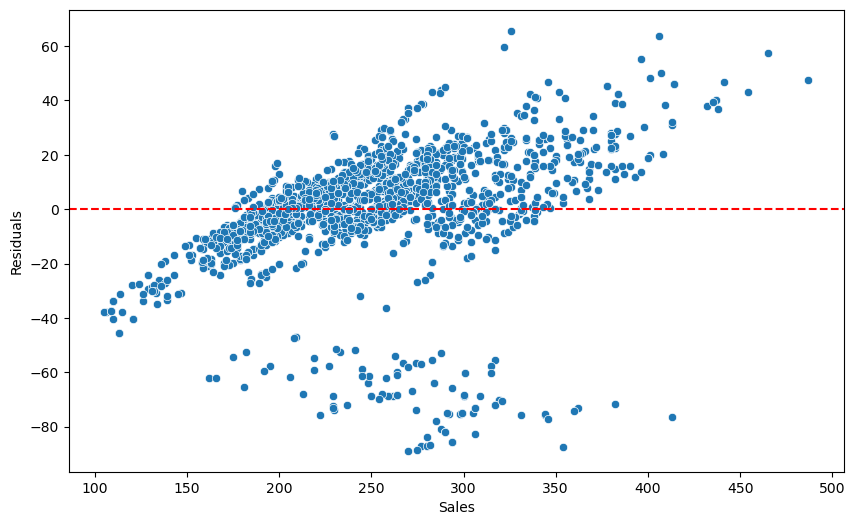

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y =residuals)
plt.xlabel('Sales')
plt.ylabel('Residuals')
plt.axhline(y =0, color= "r", linestyle = "--")
plt.show()

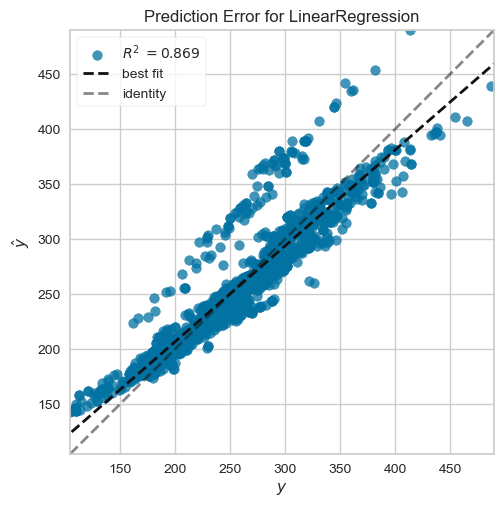

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [37]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()